# Tugas Akhir | Analisis

## 1. Load Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imuhammad/course-reviews-on-coursera")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imuhammad/course-reviews-on-coursera/versions/1


In [ ]:
import os

# List files in the dataset directory
print(os.listdir(path))

['Coursera_reviews.csv', 'Coursera_courses.csv']


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Load a CSV file from the downloaded dataset
file_path = os.path.join(path, "Coursera_reviews.csv")  # Replace with the actual file name
df_review = pd.read_csv(file_path)

# Show the first few rows of the dataset
df_review.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was very detailed and easy to follow.,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
# Load a CSV file from the downloaded dataset
file_path = os.path.join(path, "Coursera_courses.csv")  # Replace with the actual file name
df_courses = pd.read_csv(file_path)

# Show the first few rows of the dataset
df_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-well-being,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-support-fundamentals,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer by Google,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi-training,google-cbrs-cpi-training


## 2. Data Understanding

### Informasi Struktur Dataset

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


### Informasi data yang hilang/Kosong (Missing Null)

In [ ]:
# Check for missing or null values
print("Data pada kolom Review yang missing null:")
print(df_review['reviews'].isnull().sum())

Data pada kolom Review yang missing null:
153


### Informasi data yang Duplikat

In [ ]:
# Menampilkan review yang terduplikasi dan jumlah kemunculannya
duplicate_reviews = df_review['reviews'].value_counts()
duplicated_only = duplicate_reviews[duplicate_reviews > 1]

print("Review yang duplikat dan jumlah kemunculannya:")
print(duplicated_only)

Review yang duplikat dan jumlah kemunculannya:
reviews
good                                                                                                                                                                                                                                                                                                                         8827
Good                                                                                                                                                                                                                                                                                                                         5445
Excellent                                                                                                                                                                                                                                                                                                    

In [ ]:
total_duplicates = df_review['reviews'].duplicated().sum()
print(f"\nTotal review duplikat: {total_duplicates}")


Total review duplikat: 996434


### Informasi Panjang Teks

In [ ]:
df_review['review_length'] = df_review['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
df_review.head(5)

,reviews,reviewers,date_reviews,rating,course_id,review_length
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,62
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,50
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,41
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,18
4,Excellent course and the training provided was very detailed and easy to follow.,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,13


### Informasi Frequency Kata pada Reviews

In [ ]:
# Melihat statistik deskriptif dari kolom review_length
print(df_review['review_length'].describe().apply(lambda x: f"{x:,.2f}"))

count    1,454,711.00
mean            22.39
std             27.57
min              0.00
25%              6.00
50%             14.00
75%             29.00
max          1,359.00
Name: review_length, dtype: object


### Informasi Kalimat Reviews

#### Review yang pendek (Dari 14 Kata kebawah)

In [ ]:
# Filter review yang panjangnya 14 kata atau kurang
short_reviews = df_review[df_review['review_length'] <= 14]

In [ ]:
# Menampilkan hasilnya
short_reviews[['reviews', 'review_length']].head(10)

,reviews,review_length
4,Excellent course and the training provided was very detailed and easy to follow.,13
5,Some of the quizzes contained material not explicitly covered in the course.,12
15,Well presented course material that takes you step by step through the required learning.,14
16,Course is easy enough if you have a basic background of installing wireless equipment.,14
17,The instructions were clear and concise. I enjoyed the learning process.,11
18,Easy to follow. Did a good job at teaching me the material.,12
19,"Excellent Training, More than enough to pass the test.",9
20,very helpful informative course to get CPI certificate,8
21,"Material covered well, and easy to use application.",8
22,Was able to knock it out in a day very good info.,12


#### Review yang sedang (15-28 kata)

In [ ]:
# Filter review dengan panjang antara 15 dan 28 kata
medium_reviews = df_review[(df_review['review_length'] >= 15) & (df_review['review_length'] <= 28)]

In [ ]:
medium_reviews[['reviews', 'review_length']].head(10)

,reviews,review_length
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,18
10,"Great course, lectures were straight forward and easy to follow along. The course provided all the information necessary to pass the CPI examination for certification.",25
11,The course was straight forward and prepared me for the CPI exam. The course provided everything I needed to pass the exam. Thanks Google... thanks Coursera.,26
12,"Pretty well designed course. Few things on the test werent covered, but if you read the provided resources you should be fine.",22
13,"Great course, i have feedback about one question and learning item id like to give feedback on. related to OMNI antennas",21
14,"The course was fine but I never received an email to download mt certificate, I have the password. Please contact me.",21
35,"Great course, lectures were straight forward and easy to follow along. The course provided all the information necessary to pass the CPI examination for certification.",25
36,The course was straight forward and prepared me for the CPI exam. The course provided everything I needed to pass the exam. Thanks Google... thanks Coursera.,26
37,"Pretty well designed course. Few things on the test werent covered, but if you read the provided resources you should be fine.",22
38,"Great course, i have feedback about one question and learning item id like to give feedback on. related to OMNI antennas",21


#### Review yang panjang (diatas 29 kata)

In [ ]:
# Filter review dengan panjang di atas 29 kata
long_reviews = df_review[df_review['review_length'] > 29]

In [ ]:
long_reviews[['reviews', 'review_length']].head(10)

,reviews,review_length
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",62
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,50
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,41
6,Solid presentation all the way through. I really appreciated the intermittent questions that popped up to check on learning as well the regular (but not needless) quizzing. There was visuals such as charts / .ppt for those of us more visually inclined as well as a transcript below the video that followed along with the presentation!,56
7,"Probably the best certification course I've taken in this respect. The course is planned out carefully, and I believe gave me everything I needed to ace my exam the first time around. The trainer for the majority of the course was awesome. She delivered the material in a great, professional mannor, but was never boring or monotoned.",57
8,The ProctorU.com system took 2 times the amount of time spent on this course over 3 days to complete. It is the worse production user system I have used in 20+ years of my IT career. You should switch to another vendor.,42
9,"Covered all of the required information in an easy to understand way and WITH VIDEO! Great, easy way to learn. The exam process was a bit drawn out and more extensive then it needed to be, but over all a great experience",42
31,Solid presentation all the way through. I really appreciated the intermittent questions that popped up to check on learning as well the regular (but not needless) quizzing. There was visuals such as charts / .ppt for those of us more visually inclined as well as a transcript below the video that followed along with the presentation!,56
32,"Probably the best certification course I've taken in this respect. The course is planned out carefully, and I believe gave me everything I needed to ace my exam the first time around. The trainer for the majority of the course was awesome. She delivered the material in a great, professional mannor, but was never boring or monotoned.",57
33,The ProctorU.com system took 2 times the amount of time spent on this course over 3 days to complete. It is the worse production user system I have used in 20+ years of my IT career. You should switch to another vendor.,42


#### Review yang bukan bahasa inggris

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b78e5461c74207f20c869093dc78fa7baa1dcefd4a423c1b3e0c487a02394ac3
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
from langdetect import detect

# Fungsi untuk memeriksa bahasa
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # Untuk kasus error (misalnya teks kosong)

# Filter review yang bukan dalam bahasa Inggris
non_english_reviews = df_review[~df_review['reviews'].apply(is_english)]

In [ ]:
# Menampilkan hasilnya
non_english_reviews[['reviews', 'review_length']].head(10)

#### Review yang memiliki emoji atau karakter khusus

In [ ]:
import re

# Fungsi untuk mendeteksi apakah teks mengandung emoji atau karakter khusus
def contains_emoji_or_special_chars(text):
    # Regex untuk mencari karakter non-alfabet (termasuk emoji)
    emoji_pattern = re.compile('[^\x00-\x7F]+')  # mencari karakter di luar ASCII
    return bool(emoji_pattern.search(text))

# Filter review yang mengandung emoji atau karakter khusus
reviews_with_emoji = df_review[df_review['reviews'].apply(contains_emoji_or_special_chars)]

In [ ]:
# Menampilkan hasilnya
reviews_with_emoji[['reviews', 'review_length']].head(10)


### Tahapan Preprocessing untuk keperluan Analysis


In [ ]:
# Replace Missing Null
# Replace NaN values with an empty string
df_review['reviews'] = df_review['reviews'].fillna('')

# Verify the changes
print(df_review['reviews'].isnull().sum())  # Should now be 0

0


In [ ]:
# LOWERCASING
# Assuming your DataFrame is named df_review
df_review['reviews'] = df_review['reviews'].str.lower()

In [ ]:
# # Remove Punctuation and Special Characters
df_review['reviews'] = df_review['reviews'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
df_review.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"pretty dry, but i was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,information was perfect! the program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,a few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


#### Tokenize reviews column

In [ ]:
pip install joblib

In [ ]:
pip install tqdm-joblib

In [ ]:
reviews_list = df_review['reviews'].tolist().copy()

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load the small English model
#nlp = spacy.load("en_core_web_sm")

# Define the tokenization function
#def tokenize_text(text):
#    return [token.text for token in nlp(text)]

# Apply tokenization with tqdm progress bar
#df_review['tokenized_reviews'] = [
#   tokenize_text(text) for text in tqdm(df_review['reviews'].fillna(""), desc="Tokenizing reviews")
#]


In [ ]:
df_review.head()

,reviews,reviewers,date_reviews,rating,course_id
0,pretty dry but i was able to pass with just tw...,By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,information was perfect the program itself was...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,a few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


### Analisis Distribusi Kata pada Review yang telah bersih

In [ ]:
# Create Word Count Column For Each Review
df_review['review_word_count'] = df_review['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
# Create Text Length Column For Each Review
df_review['review_char_count'] = df_review['reviews'].apply(lambda x: len(str(x)))

In [ ]:
df_review.head()

,reviews,reviewers,date_reviews,rating,course_id,review_word_count,review_char_count
0,pretty dry but i was able to pass with just tw...,By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,62,334
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,50,244
2,information was perfect the program itself was...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,41,220
3,a few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,18,82
4,excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,13,79


Here's a general description of the numbers:

1. **`review_word_count`**:
   - This column shows the number of words in each review.
   - Words are separated by spaces, and each meaningful word or token contributes to the count.
   - Higher word counts generally indicate longer reviews with more detailed feedback, while lower counts indicate shorter, more concise reviews.
   - Example:
     - A high word count (e.g., 62) could represent a detailed explanation or elaboration.
     - A low word count (e.g., 13) might reflect a brief or summarized opinion.

2. **`review_char_count`**:
   - This column displays the number of characters in each review.
   - It includes all visible characters, such as letters, numbers, punctuation, and spaces.
   - Character count helps understand the overall size of the review text, especially when punctuation or formatting may vary.
   - Example:
     - A high character count (e.g., 346) reflects longer text with more elaboration.
     - A low character count (e.g., 80) represents shorter, concise input, often with fewer sentences.

3. **Overall Significance**:
   - These metrics provide insights into the level of detail in reviews.
   - By analyzing the distribution of these values across the dataset, we can identify patterns, such as whether most reviewers tend to leave detailed feedback or brief responses.
   - The numbers can also serve as a basis for further text analysis, such as readability scoring, sentiment analysis, or identifying trends in verbose vs. concise reviewers.

In [ ]:
# Round the summary statistics for better readability
summary = df_review[['review_word_count', 'review_char_count']].describe().T

# Round to 2 decimal places
summary = summary.round(2)

# Print the summary in a readable way
print(summary)

                       count    mean     std  min   25%   50%    75%     max
review_word_count  1454711.0   22.16   27.41  0.0   6.0  14.0   29.0  1348.0
review_char_count  1454711.0  128.56  156.42  0.0  35.0  84.0  167.0  7669.0


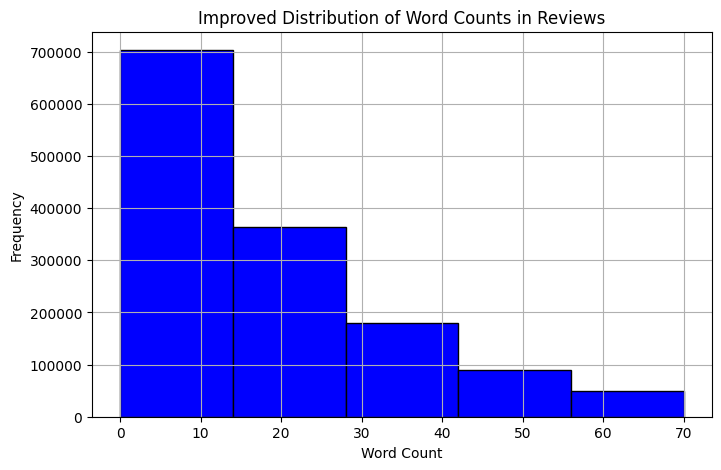

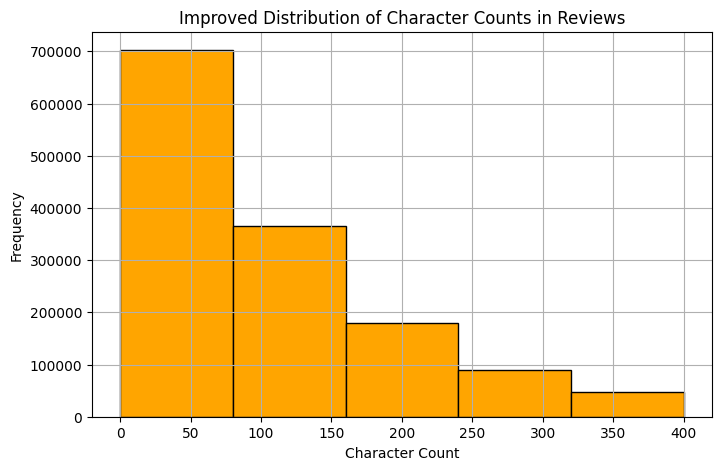

In [ ]:
import matplotlib.pyplot as plt

# Visualizations for review_word_count and review_char_count
# Histogram for word counts
plt.figure(figsize=(8, 5))
plt.hist(df_review['review_word_count'], bins=5, range=(0, 70), edgecolor='black', color='blue')
plt.title('Improved Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Adjusted histogram for character counts
plt.figure(figsize=(8, 5))
plt.hist(df_review['review_char_count'], bins=5, range=(0, 400), edgecolor='black', color='orange')
plt.title('Improved Distribution of Character Counts in Reviews')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()